In [8]:
import pandas as pd
import folium

# Carica il file CSV contenente latitudine, longitudine e valore medio
df = pd.read_csv('o3_filtrato.csv')  # Sostituisci con il nome del tuo file

# Stampa i nomi delle colonne per verificare che siano corretti
print(df.columns)

# Aggrega i dati per Comune e Provincia, prendendo il valore massimo per ogni gruppo
df_max = df.groupby(['Comune', 'Provincia'], as_index=False).agg({
    "Giorni di superamento dell obiettivo a lungo termine1": "max",
    "latitudine": "first",  # Correggi il nome se necessario
    "longitudine": "first"
})

# Crea una mappa centrata sulla media delle coordinate
mappa = folium.Map(location=[df_max['latitudine'].mean(), df_max['longitudine'].mean()], zoom_start=8)

# Aggiungi cerchi per ogni riga del CSV con colore condizionale e popup
for _, row in df_max.iterrows():
    # Determina il colore del cerchio in base al valore della colonna 'Giorni di superamento'
    if row["Giorni di superamento dell obiettivo a lungo termine1"] < 20:
        colore = "green"
    elif 20 <= row["Giorni di superamento dell obiettivo a lungo termine1"] <= 40:
        colore = "yellow"
    else:
        colore = "red"
    
    # Crea il popup con le informazioni dal CSV
    popup_info = f"Comune: {row['Comune']}<br>Provincia: {row['Provincia']}<br>Giorni di superamento: {row['Giorni di superamento dell obiettivo a lungo termine1']}"

    # Aggiungi il cerchio alla mappa con il colore e il popup
    folium.Circle(
        location=[row['latitudine'], row['longitudine']],  # Posizione del cerchio
        radius=100,  # Raggio del cerchio in metri
        color=colore,  # Colore del bordo
        fill=True,  # Riempie il cerchio
        fill_color=colore,  # Colore di riempimento
        fill_opacity=0.4,  # Opacità del riempimento
        popup=popup_info  # Popup con le informazioni
    ).add_to(mappa)

# Salva la mappa come file HTML
html_file = 'mappa_con_popup_O3.html'
mappa.save(html_file)

# Stampa un messaggio di successo
print("Mappa generata e salvata come 'mappa_con_popup_O3.html'")


Index(['Unnamed: 0', 'Provincia', 'Comune',
       'Ore di di superamento della soglia di informazione(180 µg/m³)',
       'Ore di superamento della soglia di allarme (240 µg/m³)',
       'Giorni di superamento dell obiettivo a lungo termine1', 'latitudine',
       'longitudine'],
      dtype='object')
Mappa generata e salvata come 'mappa_con_popup_O3.html'


Index(['Unnamed: 0', 'Provincia', 'Comune',
       'Ore di di superamento della soglia di informazione',
       'Ore di superamento della soglia di allarme',
       'Giorni di superamento dell obiettivo a lungo termine1', 'latitudine',
       'longitudine'],
      dtype='object')
Comune
Moggio        113.0
Vallelaghi    111.0
Osio Sotto     98.0
Piacenza       90.0
Erba           89.0
Genova         88.0
Voghera        87.0
Lodi           87.0
Pioltello      84.0
Bergamo        83.0
Name: Giorni di superamento dell obiettivo a lungo termine1, dtype: float64


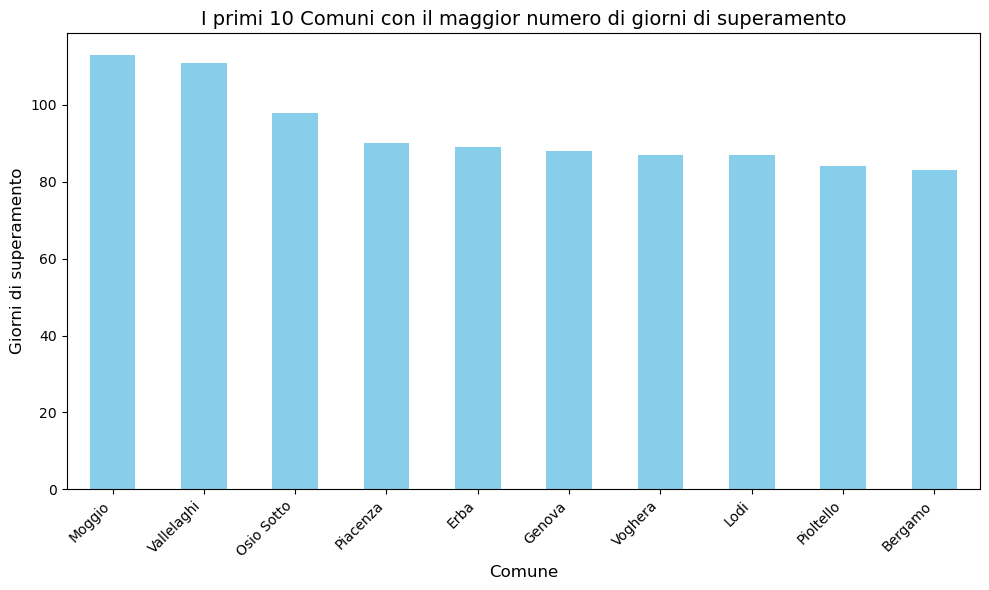

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Carica il file CSV contenente i dati
df = pd.read_csv('o3_filtrato.csv')  # Assicurati che il file sia nella stessa cartella dello script

# Stampa i nomi delle colonne per verificare la loro correttezza
print(df.columns)

# Raggruppa per Comune e prendi il valore massimo dei giorni di superamento della soglia
valoreMedio = df.groupby('Comune')['Giorni di superamento dell obiettivo a lungo termine1'].max()

# Ordina i Comuni per numero di giorni di superamento della soglia in ordine decrescente
valoreMedio = valoreMedio.sort_values(ascending=False)

# Seleziona i primi 10 Comuni con il maggiore numero di giorni di superamento della soglia
top_10_comuni = valoreMedio.head(10)

# Stampa i primi 10 comuni per verifica
print(top_10_comuni)

# Crea il grafico a barre
plt.figure(figsize=(10, 6))
top_10_comuni.plot(kind='bar', color='skyblue')

# Aggiungi titolo e etichette agli assi
plt.title('I primi 10 Comuni con il maggior numero di giorni di superamento', fontsize=14)
plt.xlabel('Comune', fontsize=12)
plt.ylabel('Giorni di superamento', fontsize=12)

# Ruota le etichette dell'asse x per una migliore leggibilità
plt.xticks(rotation=45, ha='right')

# Mostra il grafico
plt.tight_layout()
plt.show()


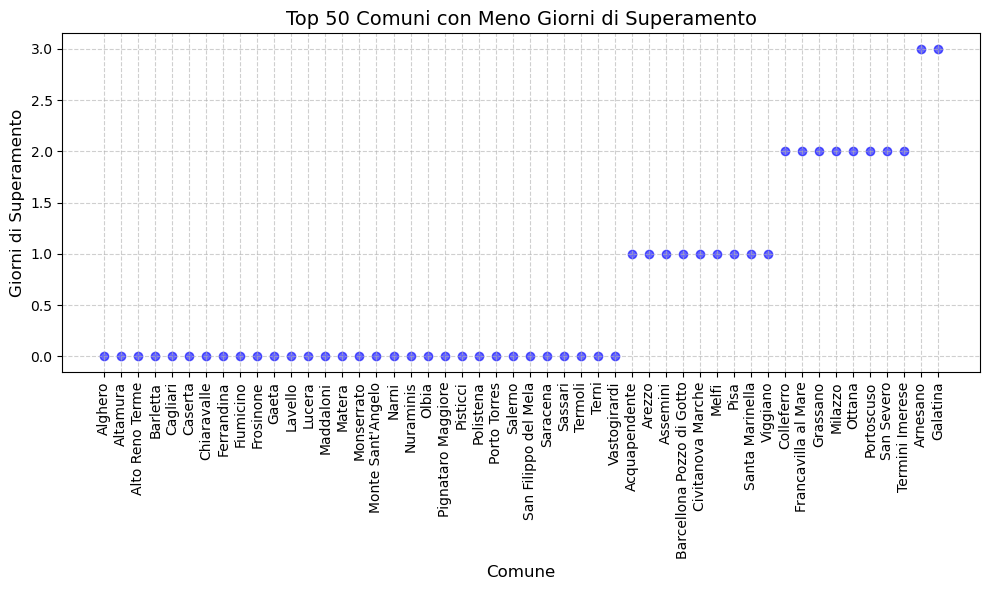

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# Carica il file CSV
df = pd.read_csv('o3_filtrato.csv')

# Converti la colonna in numerico
df['Giorni di superamento dell obiettivo a lungo termine1'] = pd.to_numeric(
    df['Giorni di superamento dell obiettivo a lungo termine1'], errors='coerce'
)

# Raggruppa per Comune e prendi il valore massimo
valoreMedio = df.groupby('Comune')['Giorni di superamento dell obiettivo a lungo termine1'].max()

# Ordina in ordine crescente e seleziona i primi 30 comuni meno inquinati
top_50_comuni = valoreMedio.nsmallest(50)

# Crea lo scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(top_50_comuni.index, top_50_comuni.values, color='blue', alpha=0.6)

# Aggiungi titolo e etichette
plt.title("Top 50 Comuni con Meno Giorni di Superamento", fontsize=14)
plt.xlabel("Comune", fontsize=12)
plt.ylabel("Giorni di Superamento", fontsize=12)

# Ruota le etichette dell'asse x per leggibilità
plt.xticks(rotation=90)
plt.grid(True, linestyle="--", alpha=0.6)

# Mostra il grafico
plt.tight_layout()
plt.show()



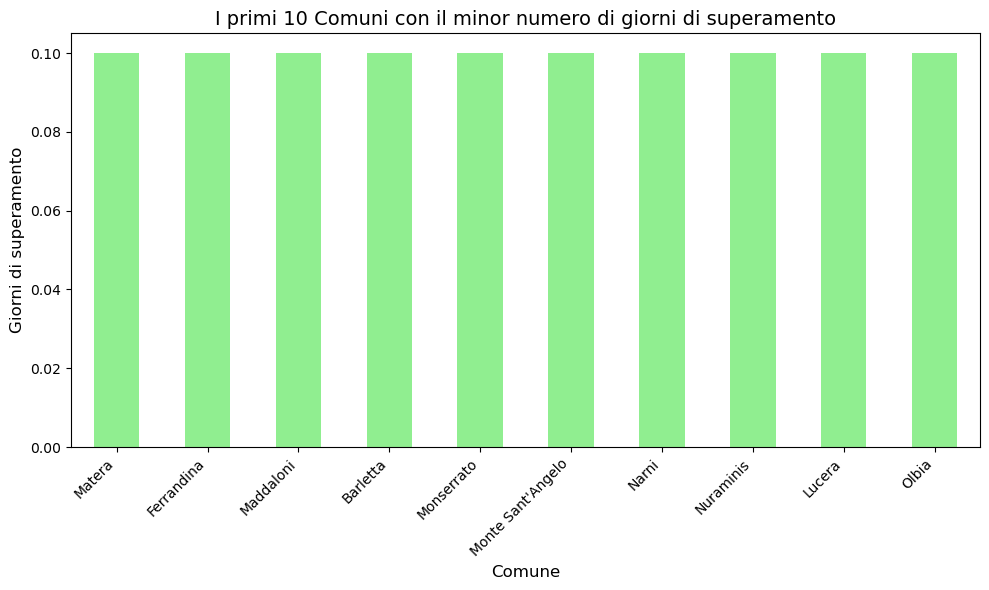

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

# Carica il file CSV
df = pd.read_csv('o3_filtrato.csv')

# Converti la colonna in numerico
df['Giorni di superamento dell obiettivo a lungo termine1'] = pd.to_numeric(
    df['Giorni di superamento dell obiettivo a lungo termine1'], errors='coerce'
)

# Raggruppa per Comune e prendi il valore massimo
valoreMedio = df.groupby('Comune')['Giorni di superamento dell obiettivo a lungo termine1'].max()

# Aggiungi un piccolo valore ai 0 per renderli visibili nel grafico
valoreMedio = valoreMedio + 0.1

# Ordina in ordine crescente
valoreMedio = valoreMedio.sort_values(ascending=True)

# Seleziona i primi 10 comuni meno inquinati
top_10_comuni = valoreMedio.head(10)

# Crea il grafico a barre
plt.figure(figsize=(10, 6))
top_10_comuni.plot(kind='bar', color='lightgreen')

# Aggiungi titolo e etichette
plt.title('I primi 10 Comuni con il minor numero di giorni di superamento', fontsize=14)
plt.xlabel('Comune', fontsize=12)
plt.ylabel('Giorni di superamento', fontsize=12)

# Ruota le etichette dell'asse x
plt.xticks(rotation=45, ha='right')

# Mostra il grafico
plt.tight_layout()
plt.show()


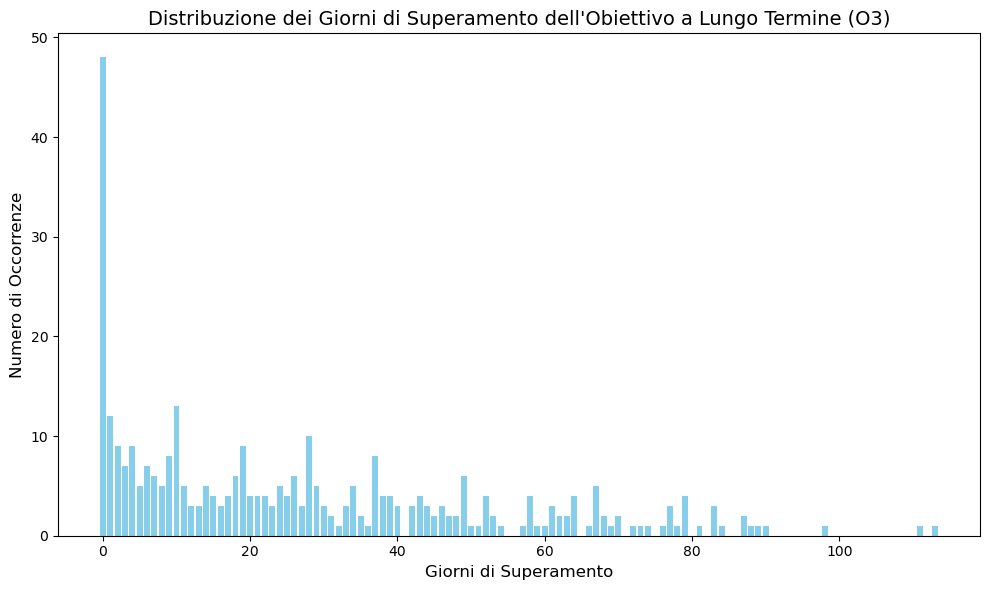

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Carica i dati dal file CSV
df = pd.read_csv('o3_filtrato.csv')

# Converti i dati numerici in float (se necessario)
df['Giorni di superamento dell obiettivo a lungo termine1'] = pd.to_numeric(
    df['Giorni di superamento dell obiettivo a lungo termine1'], errors='coerce'
)

# Rimuovi eventuali valori nulli
df = df.dropna(subset=['Giorni di superamento dell obiettivo a lungo termine1'])

# Conteggia il numero di volte che ogni valore appare nel dataset
valore_counts = df['Giorni di superamento dell obiettivo a lungo termine1'].value_counts().sort_index()

# Crea un grafico a barre (istogramma)
plt.figure(figsize=(10, 6))
plt.bar(valore_counts.index, valore_counts.values, color='skyblue')

# Aggiungi titolo e etichette agli assi
plt.title("Distribuzione dei Giorni di Superamento dell'Obiettivo a Lungo Termine (O3)", fontsize=14)
plt.xlabel("Giorni di Superamento", fontsize=12)
plt.ylabel("Numero di Occorrenze", fontsize=12)

# Mostra il grafico
plt.tight_layout()
plt.show()



